In [2]:
import networkx as nx
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from numpy.linalg import matrix_rank

In [3]:
# https://www.sciencedirect.com/topics/mathematics/markov-chain

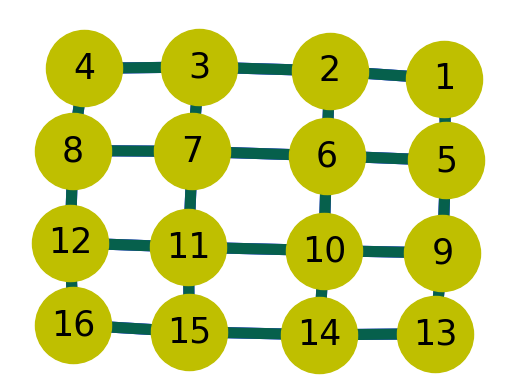

<Figure size 2000x2000 with 0 Axes>

In [4]:
#Weighted Network
'''G_weighted = nx.Graph()
G_weighted.add_edge('x1', 'x1', weight = "{:.2f}".format(1/3))
G_weighted.add_edge('x1', 'x2', weight = "{:.2f}".format(1/3))
G_weighted.add_edge('x1', 'x5', weight = "{:.2f}".format(1/3))
########################################
G_weighted.add_edge('x2', 'x2', weight = "{:.2f}".format(1/4))
G_weighted.add_edge('x2', 'x1', weight = "{:.2f}".format(1/4))
G_weighted.add_edge('x2', 'x3', weight = "{:.2f}".format(1/4))
G_weighted.add_edge('x2', 'x6', weight = "{:.2f}".format(1/4))
########################################
G_weighted.add_edge('x3', 'x3', weight = "{:.2f}".format(1/4))
G_weighted.add_edge('x3', 'x2', weight = "{:.2f}".format(1/4))
G_weighted.add_edge('x3', 'x7', weight = "{:.2f}".format(1/4))
G_weighted.add_edge('x3', 'x4', weight = "{:.2f}".format(1/4))
########################################
G_weighted.add_edge('x4', 'x4', weight = "{:.2f}".format(1/3))
G_weighted.add_edge('x4', 'x3', weight = "{:.2f}".format(1/3))
G_weighted.add_edge('x4', 'x8', weight = "{:.2f}".format(1/3))'''
sample = open (r"D:\datawork\graph.txt")
G_weighted = nx.read_edgelist(sample, create_using = nx.Graph(), nodetype=int)
#med = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if 10>= d["weight"] >= 4]
#elarge = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d["weight"] > 10]
#esmall = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d["weight"] <= 1]          


# positions for all nodes - seed for reproducibility
pos = nx.spring_layout(G_weighted, seed=2)

# nodes
nx.draw_networkx_nodes(G_weighted, pos, node_size=3000,node_color='y')

# edges
nx.draw_networkx_edges(G_weighted, pos, width=8, alpha=0.7,edge_color="b")
nx.draw_networkx_edges(G_weighted, pos, width=8, alpha=0.7,edge_color="b")
nx.draw_networkx_edges(G_weighted, pos, width=8, alpha=0.7, edge_color="g")

# node labels
nx.draw_networkx_labels(G_weighted, pos, font_size=25, font_family="sans-serif")

# edge weight labels
edge_labels = nx.get_edge_attributes(G_weighted, "weight")
nx.draw_networkx_edge_labels(G_weighted, pos, edge_labels)
     
ax = plt.gca()
ax.margins(0.1)
plt.axis("off")
plt.figure(figsize=(20,20))
plt.tight_layout()
plt.show()

In [5]:
sample = open (r"D:\datawork\graph.txt")
G = nx.read_edgelist(sample, create_using = nx.Graph(), nodetype=int)
print((G))

Graph with 16 nodes and 40 edges


(-1.1129195706529011,
 1.1068544931536124,
 -1.1155413624392607,
 1.2222165444295594)

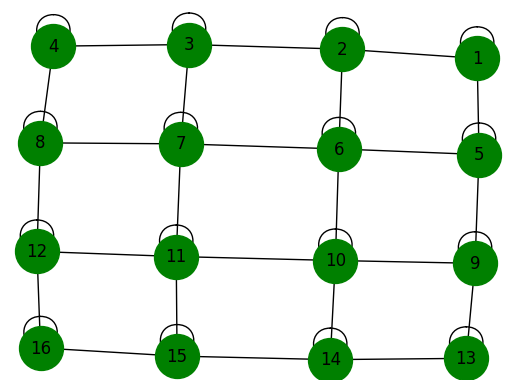

In [6]:
pos = nx.spring_layout(G, seed=2)
nx.draw_networkx(G,pos=pos, with_labels=True,node_size=1000,node_color='g')
plt.rcParams["figure.figsize"] = (20,20)
ax = plt.gca()
ax.margins(0.01)
plt.axis("off")

(-1.1999695339394312,
 1.1939044564401424,
 -1.2072181431007831,
 1.3138933250910823)

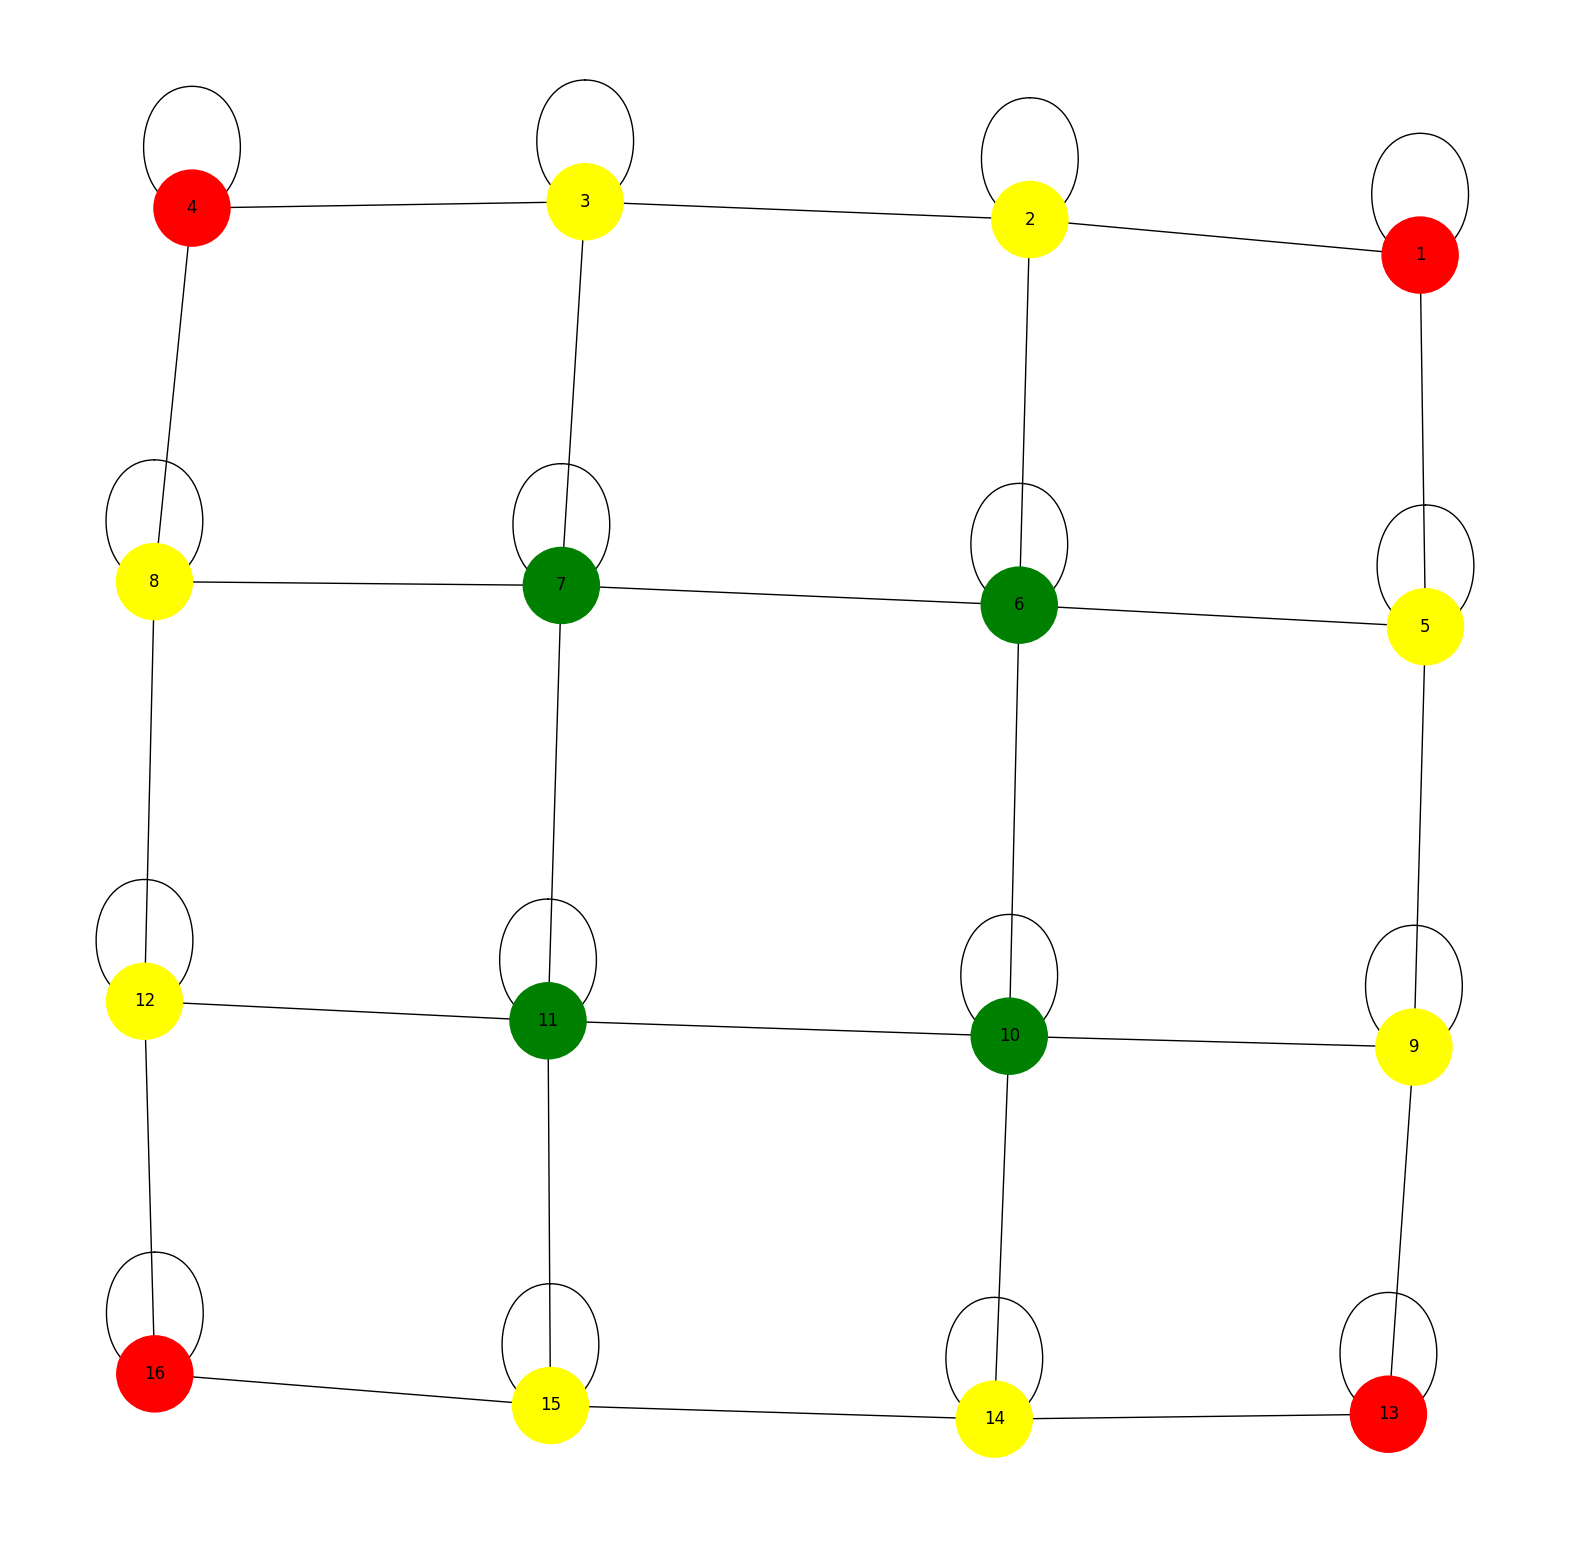

In [7]:
color_map = []
for s in G.degree:
    if s[1] == 4 :
        color_map.append('red')
    elif s[1] == 5:
        color_map.append('yellow')
    else: 
        color_map.append('green')      
nx.draw_networkx(G, pos=pos, with_labels=True,
                 node_color=color_map,node_size=3000 )
plt.axis('off')

(-1.1999695339394312,
 1.1939044564401424,
 -1.2072181431007831,
 1.3138933250910823)

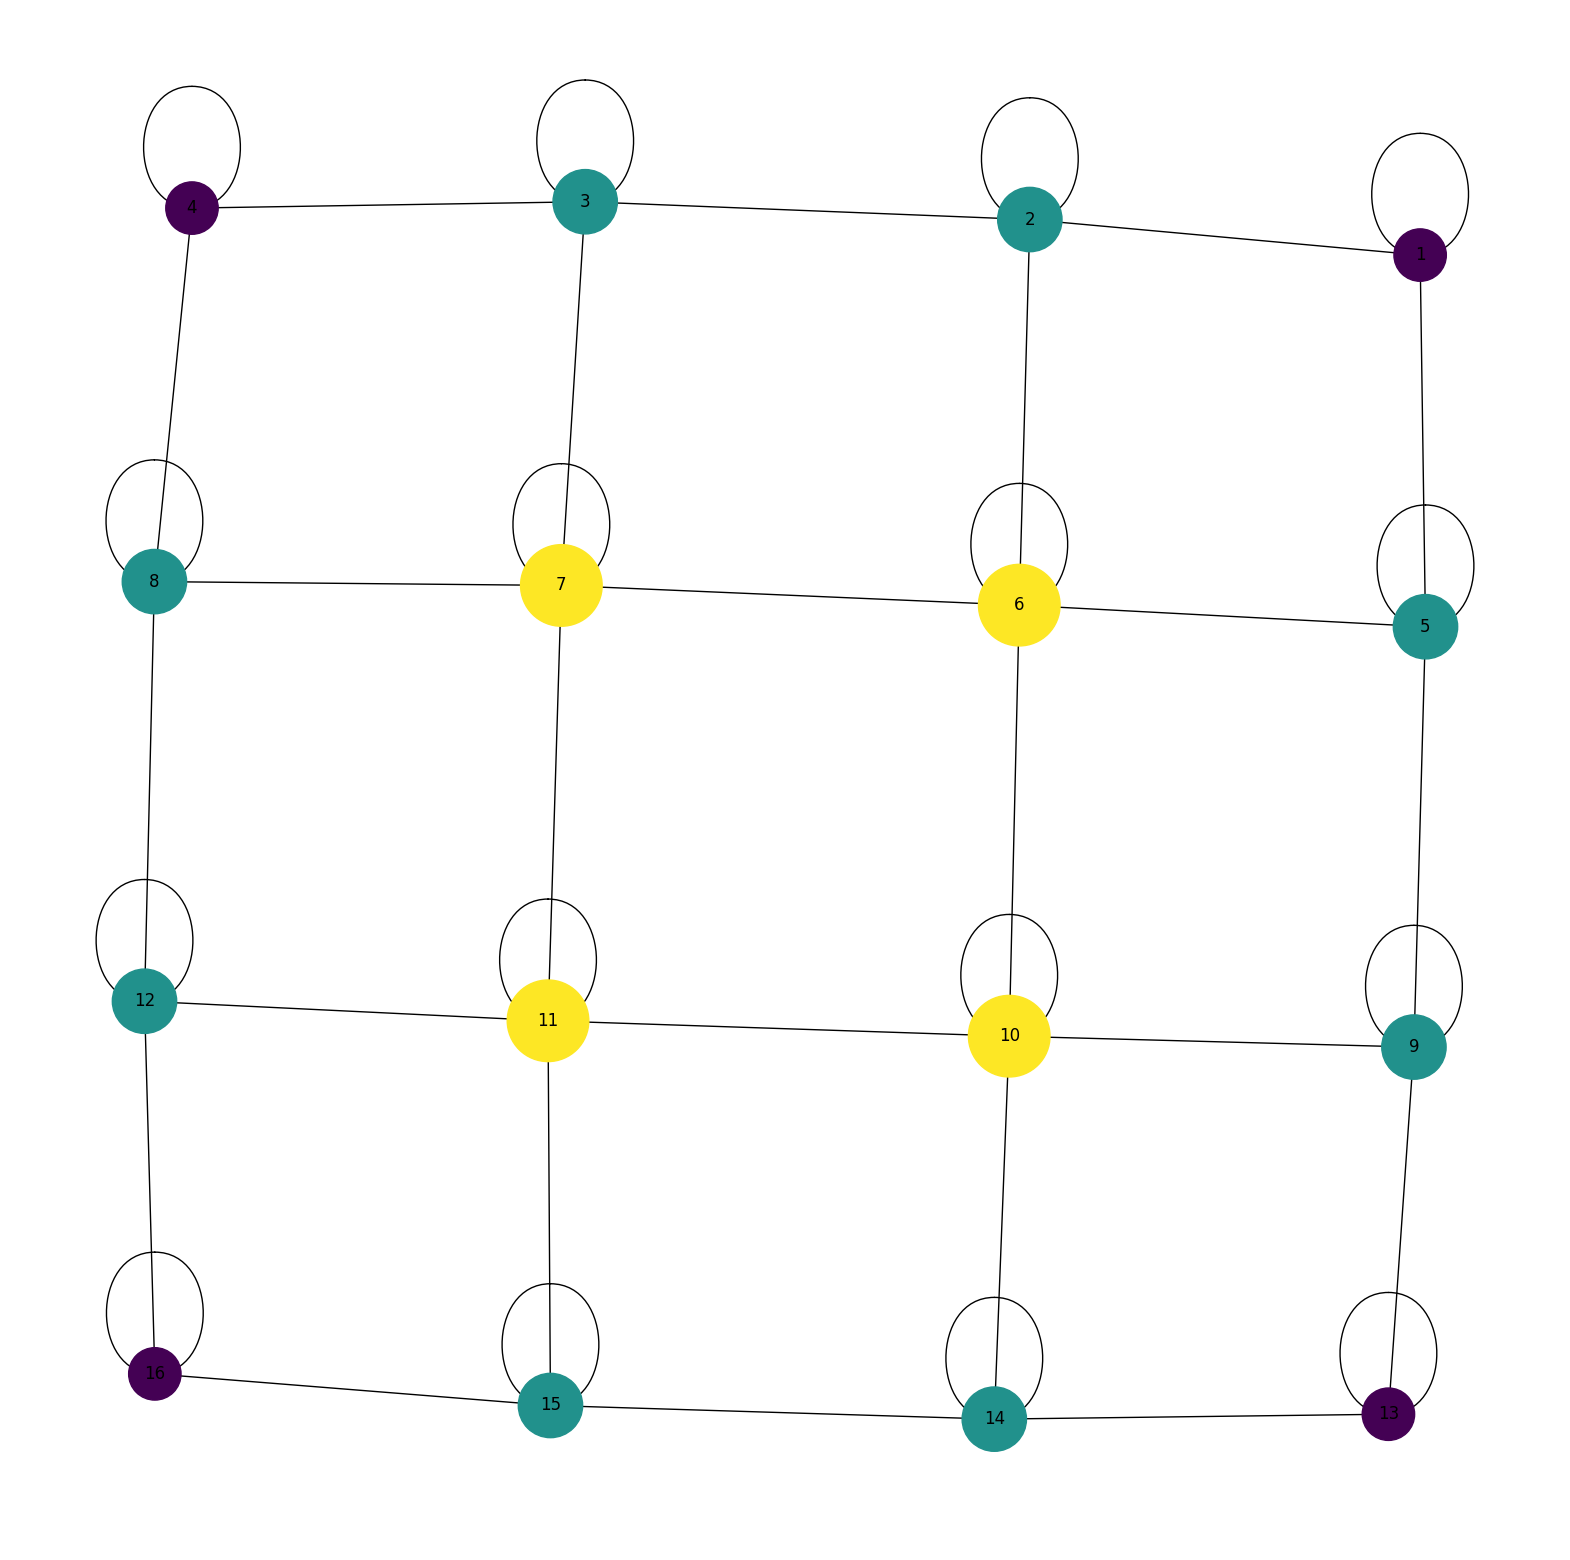

In [8]:
os = nx.spring_layout(G, seed=2)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [10000.0* G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [9]:
for s in G.edges:
    print(s)

(1, 1)
(1, 2)
(1, 5)
(2, 2)
(2, 6)
(2, 3)
(5, 5)
(5, 6)
(5, 9)
(6, 6)
(6, 7)
(6, 10)
(3, 3)
(3, 7)
(3, 4)
(7, 7)
(7, 8)
(7, 11)
(4, 4)
(4, 8)
(8, 8)
(8, 12)
(9, 9)
(9, 10)
(9, 13)
(10, 10)
(10, 11)
(10, 14)
(11, 11)
(11, 12)
(11, 15)
(12, 12)
(12, 16)
(13, 13)
(13, 14)
(14, 14)
(14, 15)
(15, 15)
(15, 16)
(16, 16)


In [10]:
for i in G.degree:
    print(i)

(1, 4)
(2, 5)
(5, 5)
(6, 6)
(3, 5)
(7, 6)
(4, 4)
(8, 5)
(9, 5)
(10, 6)
(11, 6)
(12, 5)
(13, 4)
(14, 5)
(15, 5)
(16, 4)


In [11]:
P_matrix = np.matrix(np.zeros((16, 16), dtype = float))
#print(P_matrix)

In [34]:
I_matrix = np.matrix(np.zeros((16, 16), dtype = float))
#print(P_matrix)

In [12]:
#P_matrix[15,0] = 10
#P_matrix[0,0] = 1
#print(P_matrix)

In [13]:
#print(P_matrix)

In [14]:
#P_matrix.item(1,0)

In [64]:
S=[]
for n in G.degree:
    if n[1] == 4:
        k=n[0]
        for s in G.edges:
            if s[0]  == k:
                i=s[0] - 1
                j=s[1] - 1
                P_matrix[i,j] = 1/3
            if s[1]  == k:
                i=s[0] - 1
                j=s[1] - 1
                P_matrix[j,i] = 1/3
    elif n[1] == 5:
        k1=n[0]
        for s in G.edges:
            if s[0] == k1:
                i=s[0] - 1
                j=s[1] - 1
                P_matrix[i,j] = 1/4
            if s[1] == k1:
                i=s[0] - 1
                j=s[1] - 1
                P_matrix[j,i] = 1/4
          
    else: 
        k2=n[0]
        for s in G.edges:
            if s[0] == k2:
                i=s[0] - 1
                j=s[1] - 1
                P_matrix[i,j] = 1/5
            if s[1] == k2:
                i=s[0] - 1
                j=s[1] - 1
                P_matrix[j,i] = 1/5


In [65]:
i=0
while i < 16:
    I_matrix[i,i] = 1
    i += 1
    


In [125]:
matrix_rank(P_matrix)

14

In [51]:
I_matrix

matrix([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0

In [118]:
B = P_matrix - I_matrix
B

matrix([[-0.66666667,  0.33333333,  0.        ,  0.        ,  0.33333333,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.25      , -0.75      ,  0.25      ,  0.        ,  0.        ,
          0.25      ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.25      , -0.75      ,  0.25      ,  0.        ,
          0.        ,  0.25      ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.33333333, -0.66666667,  0.        ,
          0.        ,  0.        ,  0.33333333,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.25      

In [83]:
matrix_rank(B)

15

In [106]:
C = np.random.randint(1,5, size= (4,4))
C

array([[1, 3, 3, 4],
       [4, 2, 4, 2],
       [2, 1, 1, 4],
       [2, 3, 1, 2]])

In [107]:
C = np.delete(C, 0, 1)  # delete second column of C

In [108]:
C

array([[3, 3, 4],
       [2, 4, 2],
       [1, 1, 4],
       [3, 1, 2]])

In [86]:
matrix_rank(B)

15

In [121]:
B = np.delete(B, 0, 1)  # delete second column of C

In [122]:
B.shape

(16, 15)

In [124]:
matrix_rank(B)

15

In [16]:
df = pd.DataFrame(P_matrix)
df=df.rename(columns={0: "x1", 1: "x2",2: "x3",3: "x4", 4: "x5",
                      5: "x6",6: "x7", 7: "x8",8: "x9",9: "x10",
                      10: "x11",11: "x12",12: "x11", 13: "x14",
                     14: "x15", 15: "x16"})

df=df.rename(index={0: "x1", 1: "x2",2: "x3",3: "x4", 4: "x5",
                    5: "x6",6: "x7", 7: "x8",8: "x9",9: "x10",
                    10: "x11",11: "x12",12: "x11", 13: "x14",
                     14: "x15", 15: "x16"})
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x11,x14,x15,x16
x1,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
x2,0.25,0.25,0.25,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
x3,0.00,0.25,0.25,0.25,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
x4,0.00,0.00,0.33,0.33,0.00,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
x5,0.25,0.00,0.00,0.00,0.25,0.25,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00
x6,0.00,0.20,0.00,0.00,0.20,0.20,0.20,0.00,0.00,0.20,0.00,0.00,0.00,0.00,0.00,0.00
x7,0.00,0.00,0.20,0.00,0.00,0.20,0.20,0.20,0.00,0.00,0.20,0.00,0.00,0.00,0.00,0.00
x8,0.00,0.00,0.00,0.25,0.00,0.00,0.25,0.25,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.00
x9,0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.25,0.25,0.00,0.00,0.25,0.00,0.00,0.00
x10,0.00,0.00,0.00,0.00,0.00,0.20,0.00,0.00,0.20,0.20,0.20,0.00,0.00,0.20,0.00,0.00


In [17]:
new_P_matrix=(P_matrix)**21

In [18]:
df_h = pd.DataFrame(new_P_matrix, dtype =float)
df_h

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.048202,0.063190,0.060968,0.044398,0.063190,0.077542,0.074525,0.057706,0.060968,0.074525,0.071530,0.055520,0.044398,0.057706,0.055520,0.040651
1,0.047871,0.063567,0.062583,0.046188,0.062499,0.077765,0.076430,0.060073,0.060073,0.074463,0.073138,0.057664,0.043717,0.057563,0.056596,0.042061
2,0.046188,0.062583,0.063567,0.047871,0.060073,0.076430,0.077765,0.062499,0.057664,0.073138,0.074463,0.060073,0.042061,0.056596,0.057563,0.043717
3,0.044398,0.060968,0.063190,0.048202,0.057706,0.074525,0.077542,0.063190,0.055520,0.071530,0.074525,0.060968,0.040651,0.055520,0.057706,0.044398
4,0.047871,0.062499,0.060073,0.043717,0.063567,0.077765,0.074463,0.057563,0.062583,0.076430,0.073138,0.056596,0.046188,0.060073,0.057664,0.042061
5,0.046995,0.062212,0.061144,0.045167,0.062212,0.077255,0.075802,0.059570,0.061144,0.075802,0.074354,0.058511,0.045167,0.059570,0.058511,0.043352
6,0.045167,0.061144,0.062212,0.046995,0.059570,0.075802,0.077255,0.062212,0.058511,0.074354,0.075802,0.061144,0.043352,0.058511,0.059570,0.045167
7,0.043717,0.060073,0.062499,0.047871,0.057563,0.074463,0.077765,0.063567,0.056596,0.073138,0.076430,0.062583,0.042061,0.057664,0.060073,0.046188
8,0.046188,0.060073,0.057664,0.042061,0.062583,0.076430,0.073138,0.056596,0.063567,0.077765,0.074463,0.057563,0.047871,0.062499,0.060073,0.043717
9,0.045167,0.059570,0.058511,0.043352,0.061144,0.075802,0.074354,0.058511,0.062212,0.077255,0.075802,0.059570,0.046995,0.062212,0.061144,0.045167


In [19]:
p_0 = np.array(df.iloc[0])

In [20]:
new_P_matrix_round =np.round(p_0*new_P_matrix,2)

In [21]:
df_h_r = pd.DataFrame(new_P_matrix_round, dtype =float)
df_h_r = df_h_r.rename(columns={0: "x1", 1: "x2",2: "x3",3: "x4", 4: "x5",
                      5: "x6",6: "x7", 7: "x8",8: "x9",9: "x10",
                      10: "x11",11: "x12",12: "x11", 13: "x14",
                     14: "x15", 15: "x16"})
df_h_r = df_h_r.rename(index={0: "x1", 1: "x2",2: "x3",3: "x4", 4: "x5",
                    5: "x6",6: "x7", 7: "x8",8: "x9",9: "x10",
                    10: "x11",11: "x12",12: "x11", 13: "x14",
                     14: "x15", 15: "x16"})
df_h_r 

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x11,x14,x15,x16
x1,0.05,0.06,0.06,0.04,0.06,0.08,0.07,0.06,0.06,0.07,0.07,0.06,0.04,0.06,0.06,0.04


In [22]:
'''f = False
sq = 2
j = 0
i = 0
H = 0
while f == False:
    H = (P_matrix)**(sq)
    if H[i,j] == H[i+1,j]:
        i += 1
    if i == len(P_matrix) - 1:
        j += 1
        i = 0
    if j == len(P_matrix) - 1:
        f = True
        print(sq)
    else:
        sq += 1
        H = 0
        
                   
#P_matrix = P_matrix**10'''

'f = False\nsq = 2\nj = 0\ni = 0\nH = 0\nwhile f == False:\n    H = (P_matrix)**(sq)\n    if H[i,j] == H[i+1,j]:\n        i += 1\n    if i == len(P_matrix) - 1:\n        j += 1\n        i = 0\n    if j == len(P_matrix) - 1:\n        f = True\n        print(sq)\n    else:\n        sq += 1\n        H = 0\n        \n                   \n#P_matrix = P_matrix**10'

In [23]:
p_0 = np.array(df.iloc[0])
H_1 = (p_0)*(P_matrix)**(15)
H_2 = (p_0)*(P_matrix)**(16)
H_1 = np.round(H_1,2)
H_2 = np.round(H_2,2)
#df_H_1 = pd.DataFrame(H_1, dtype =float)
#df_H_2 = pd.DataFrame(H_2, dtype =float)
s_0 = H_1 == H_2
s_1 = H_1 == H_1
result_0 = np.array(s_0)
result_1 = np.array(s_1)

False not in result_1

True

In [24]:
p_n1 = (p_0)*(P_matrix)**(100)
p_n2 = (p_0)*(P_matrix)**(101)
p_n1 = np.round(p_n1,2)
p_n2 = np.round(p_n2,2)
S = p_n1 == p_n2

result = np.array(S)
S = pd.DataFrame(result)
S

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [25]:
H_1 = (p_0)*(P_matrix)**(21)
H_1 = np.round(H_1,2)
Ser = pd.DataFrame(H_1)
Ser

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.05,0.06,0.06,0.04,0.06,0.08,0.07,0.06,0.06,0.07,0.07,0.06,0.04,0.06,0.06,0.04


In [26]:
def Find_the_steady_state_number(p0,IP):
    ####################################
    def check_error(n,p_n):
        p_1 = p_n
        sq = n+1
        p_2 =(p0)*(IP)**(sq)
        p_2 = np.round(p_2,2)
        S = p_2 == p_1
        result = np.array(S)
        if False not in result:
            return True
        else:
            return False
   #####################################     
    i = 0
    j = 0
    f= False
    sq = 2
    p_n2 = 0
    while f == False:
        p_n1 = (p0)*(IP)**(sq)
        p_n1 = np.round(p_n1,2)
        S = p_n2 == p_n1
        result = np.array(S)
        if False not in result and check_error(sq,p_n1) == True:
            print(sq)
            f = True
        else:
            p_n2 = p_n1
            sq += 1     

In [27]:
Find_the_steady_state_number(p_0,P_matrix)

21


In [28]:
df.iloc[14]

x1     0.00
x2     0.00
x3     0.00
x4     0.00
x5     0.00
x6     0.00
x7     0.00
x8     0.00
x9     0.00
x10    0.00
x11    0.25
x12    0.00
x11    0.00
x14    0.25
x15    0.25
x16    0.25
Name: x15, dtype: float64

In [29]:
def Pnk(n):
    n=int(n)
    p_0=df.iloc[0]
    p_0 = np.array(p_0)
    IP = (P_matrix)**n
    sample = p_0*IP
    return sample 

In [30]:
# p :
sp = Pnk(300)
sp_1 = np.round(sp,2)
sp_1 = pd.DataFrame(sp_1)
sp_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.03,0.04,0.04,0.03,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.04,0.04,0.03


In [31]:
# sp * IP = sP
IP = (P_matrix)
spip = sp*IP
spip = np.round(spip,2)
spip = pd.DataFrame(spip)
spip

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.03,0.04,0.04,0.03,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.04,0.04,0.03
